In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt

invoices = pandas.read_csv(r'C:\Users\Lenovo\Downloads\ITMGT_25.03\Module 6\fct_invoice.csv')
customers = pandas.read_json(r'C:\Users\Lenovo\Downloads\ITMGT_25.03\Module 6\dim_customer.json')

In [18]:
print (customers.columns)

Index(['age', 'first_name', 'gender', 'id', 'last_name'], dtype='object')


1. How many unique customers are in the dataset?

In [19]:
unique_customers = customers['id'].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 5191


In [20]:
print (invoices.columns)

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')


2. What are the different categories of products available? How many unique categories are there?

In [29]:
unique_categories = invoices['category'].unique()
print("Categories:", unique_categories)
print ("Unique Categories: " + str(len(unique_categories)))

Categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
Unique Categories: 8


3. Which payment method is the most popular? How many times was it used?

In [45]:
most_common_method = invoices['payment_method'].mode()

frequency = invoices['payment_method'].value_counts()
print (frequency)

print("Most popular payment method:")
for method in most_common_method:
    print(f"'{method}' was used {frequency[method]} times.")

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64
Most popular payment method:
'Cash' was used 44447 times.


1. What are the three most popular categories, by total sales?

In [51]:
invoices["total_sales"] = invoices["quantity"] * invoices["price"]

top_categories = invoices.groupby("category")["total_sales"].sum().sort_values(ascending=False).head(3).reset_index()
print(top_categories)

     category   total_sales
0    Clothing  1.139968e+08
1       Shoes  6.655345e+07
2  Technology  5.786235e+07


2. What are the total sales attributed to customers over the age of 45?

In [60]:
merged = pd.merge(invoices, customers, left_on="customer_id", right_on="id")

over_45 = merged[merged["age"] > 45]

merged["total_sales"] = merged["quantity"] * merged["price"]

sales_over_45 = over_45["total_sales"].sum()
print("Total sales for customers over 45: " + str(sales_over_45))

Total sales for customers over 45: 82039768.15


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this)

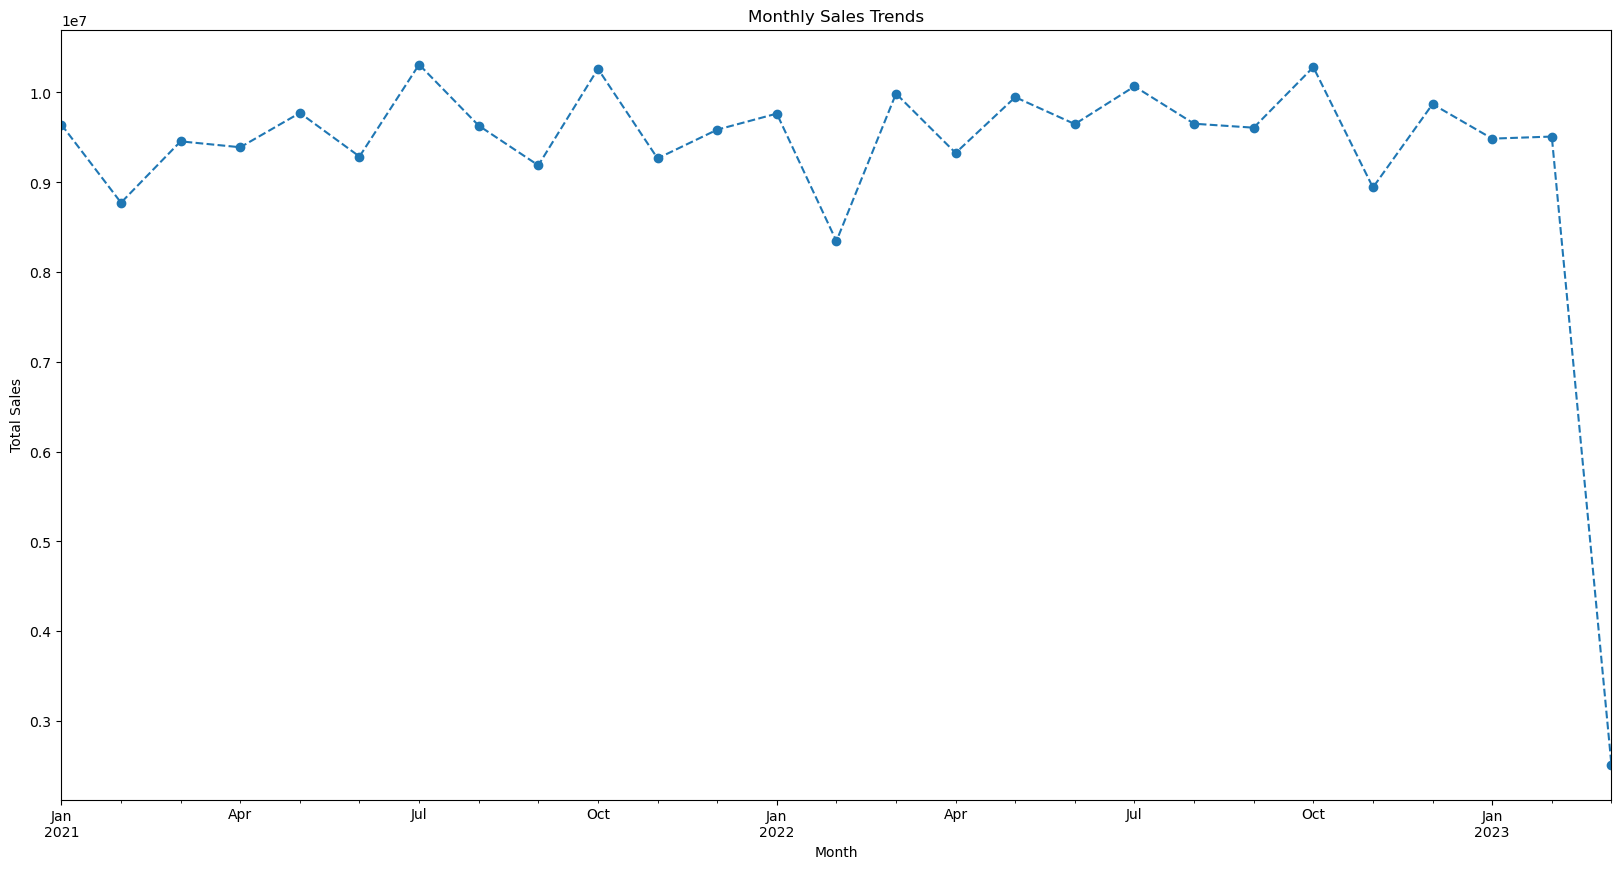

In [71]:
invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"], dayfirst=True)

invoices["total_sales"] = invoices["quantity"] * invoices["price"]

monthly_sales = invoices.resample('ME', on='invoice_date')["total_sales"].sum()

plt.figure(figsize=(20, 10))
monthly_sales.plot(marker='o', linestyle='--')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [77]:
customers.rename(columns={'id': 'customer_id'}, inplace=True)
df = pd.merge(invoices, customers, on='customer_id')

# Create the 'decade_age_range' column
# Define the bins and labels for the age ranges
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df['decade_age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

pivot_table = pd.pivot_table(df,observed=False,index=['category', 'decade_age_range'],values='price',aggfunc='sum')

print("Pivot Table of Sales by Category and Decade Age Range:")
print(pivot_table)

Pivot Table of Sales by Category and Decade Age Range:
                               price
category decade_age_range           
Books    10-19               3469.35
         20-29              21619.05
         30-39              22997.70
         40-49              23361.30
         50-59              20664.60
...                              ...
Toys     40-49             106910.72
         50-59              94115.84
         60-69             100244.48
         70-79              74475.52
         80-89              43043.84

[64 rows x 1 columns]
